In [1]:
# EDA pamages 
import pandas as pd

In [2]:
# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data
df = pd.read_csv("C:\\Users\\haier\\Downloads\\covid19_tweets.csv")

In [5]:
#here i am droping all null values for forever 
df.dropna(inplace=True)

In [6]:
# here i am confirming that all null values are dropped or not 
df.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

In [7]:
# the whole dataset is converted into lowercase()
df=df.apply(lambda x: x.astype(str).str.lower()) 

In [8]:
''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

In [9]:
'''here i define function with two variables to get difference of previous and new columns
afterwards i cleaned all unwantEd thkings fROM data such as below '''
def get_clean_data_column (new_column_name , column_name ):
    df[new_column_name] = df[column_name].apply(nfx.remove_emojis)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_punctuations)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_special_characters)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_multiple_spaces)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_stopwords)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_urls)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_visacard_addr)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_terms_in_bracket)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_street_address)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_puncts)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_postoffice_box)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_phone_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_html_tags)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_currency_symbols)
    return df[new_column_name]

In [10]:
'''here i made a dictionary in which i gave the names of new and previous columns '''
dict_names ={'cleaning_user_name':'user_name',
             'cleaning_user_location':'user_location',
             'cleaning_user_description':'user_description',
             'cleaning_text':'text',
             'cleaning_hashtags':'hashtags',
             'cleaning_source':'source'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    get_clean_data_column(i,j)

In [11]:
'''here i got my cleaned data after some instructions'''
df[['user_name','cleaning_user_name']].head()

,user_name,cleaning_user_name
2,time4fisticuffs,timefisticuffs
3,ethel mertz,ethel mertz
4,dipr-j&k,diprjk
5,🎹 franz schubert,franz schubert
6,hr bartender,hr bartender


In [12]:
#df[['user_location','cleaning_user_location']].head(2)

In [13]:
#df[['user_description','cleaning_user_description']].head(2)

In [14]:
#df[['text','cleaning_text']].head(2)

In [15]:
#df[['hashtags','cleaning_hashtags']].head(2)

In [16]:
#df[['source','cleaning_source']].head(2)

In [17]:
#i import package of time and date to get simple form of those 
import datetime

#it is function 
def get_time_date(column_name,
                  new_column_name_year,
                  new_column_name_month,
                  new_column_name_day,
                  new_column_name_hour,
                  new_column_name_minute,
                  new_column_name_second):
    
    '''it is in object type to convert into datetime.
        Pandas to_datetime() method helps to convert 
        string Date time into Python Date time object'''
    df[column_name] = pd.to_datetime(df[column_name])
    
    df[new_column_name_year]=df[column_name].dt.year
    df[new_column_name_month]=df[column_name].dt.month
    df[new_column_name_day]=df[column_name].dt.day
    df[new_column_name_hour]=df[column_name].dt.hour
    df[new_column_name_minute]=df[column_name].dt.minute
    df[new_column_name_second]=df[column_name].dt.second

In [18]:
# here i call function with variables 
get_time_date(column_name = 'user_created',
              new_column_name_year = 'years',
              new_column_name_month = 'months',
              new_column_name_day = 'days',
              new_column_name_hour='hours',
              new_column_name_minute='minutes',
              new_column_name_second='seconds')

In [19]:
'''here i import a package called textblob
    TextBlob is a Python (2 and 3) library for processing textual data.
    It provides a simple API for diving into common natural language processing (NLP) tasks such as
    1)part-of-speech tagging,
    2)noun phrase extraction,
    3)sentiment analysis,
    4)classification,
    5)translation, and more.'''

from textblob import TextBlob

In [20]:
def get_sentiment(column_id):
    blob = TextBlob(column_id)
    '''Sentiment Analysis is the process of assessing data and categorizing
    it according to the needs.'''
    
    '''The polarity and subjectivity of a statement are returned by TextBlob.
    The range of polarity is [-1,1],
    with -1 indicating a negative sentiment and 1 indicating a positive sentiment.'''
    
    sentiment_polarity = blob.sentiment.polarity
    
    '''subjectivity falls under the numeric range of [0,1]. 
    The degree of personal opinion and factual information in a text is measured by subjectivity.
    Because of the text’s heightened subjectivity,
    it contains personal opinion rather than factual information.'''
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0 :
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Natural'
    result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
    return result

In [21]:
exl = df['cleaning_text'].iloc[0]

In [22]:
get_sentiment(exl)

{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentiment': 'Natural'}

In [23]:
def get_sentiment_results(column_mark):
    df['sentiment_results'] = df[column_mark].apply(get_sentiment)
    return df['sentiment_results']

In [24]:
get_sentiment_results('cleaning_text')

2         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3         {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
4         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5         {'Polarity': -0.6999999999999998, 'Subjectivit...
6         {'Polarity': 0.05000000000000002, 'Subjectivit...
                                ...                        
179101    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179102    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179103    {'Polarity': 0.2, 'Subjectivity': 0.2, 'Sentim...
179104    {'Polarity': 0.8, 'Subjectivity': 0.7, 'Sentim...
179106    {'Polarity': 0.14488636363636365, 'Subjectivit...
Name: sentiment_results, Length: 99138, dtype: object

In [25]:
'''json_normalize: Normalize semi-structured JSON data into a flat table. Unserialized JSON objects.'''
from pandas.io.json import json_normalize

In [26]:
def get_json_normalize(normalize_colunm_name):
    result = pd.json_normalize(df[normalize_colunm_name])
    return result

In [27]:
get_json_normalize('sentiment_results')

,Polarity,Subjectivity,Sentiment
0,0.000000,0.000000,Natural
1,0.000000,0.357143,Natural
2,0.000000,0.000000,Natural
3,-0.700000,0.666667,Negative
4,0.050000,0.500000,Positive
...,...,...,...
99133,0.000000,0.000000,Natural
99134,0.000000,0.000000,Natural
99135,0.200000,0.200000,Positive
99136,0.800000,0.700000,Positive


In [28]:
#to join the columns of sentiment_result to dataset we use this
df = df.join(pd.json_normalize(df['sentiment_results']))

In [29]:
#here I made a function to get positive , negative and nutral tweets 
def get_pnn_tweet(name_of_pnn):
    pnn_tweet = df[df['Sentiment']==name_of_pnn]['cleaning_text']
    return pnn_tweet
    #positive_tweet.head()

In [30]:
pos_tweet = get_pnn_tweet('Positive')

In [31]:
pos_tweet

4        july media bulletin novel coronavirusupdates c...
17       second wave covid flandersback homework httpst...
24                   holy water times covid httpstcoyazyxl
26       munitions response team bosniaandherzegovina m...
28       tncoronaupdatetn crosses lakh mark ppp recover...
                               ...                        
99098    meet kirsty shes looking ways engage older pop...
99100    nhs testandtrace fail government pays wages un...
99115    heartoftexas showing reject fearmongering chea...
99127    know strengthsfollow bizopportunitynowhttpstco...
99135    share thoughts new normal implications covid f...
Name: cleaning_text, Length: 18961, dtype: object

In [32]:
neg_tweet = get_pnn_tweet('Negative')

In [33]:
nat_tweet = get_pnn_tweet('Natural')

In [34]:
#here I made a function to get positive , negative and nutral tweets tokens 
def get_pnn_token(pnn_list_name):
    pnn_token = [token for line in pnn_list_name for token in line.split()]
    return pnn_token

In [35]:
positive = get_pnn_token(pos_tweet)

In [36]:
positive

['july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'covid',
 'kansalrohit',
 'drsyedsehrish',
 'airnewsalerts',
 'ani',
 'httpstcomneecsjhh',
 'second',
 'wave',
 'covid',
 'flandersback',
 'homework',
 'httpstcoswimzacmn',
 'holy',
 'water',
 'times',
 'covid',
 'httpstcoyazyxl',
 'munitions',
 'response',
 'team',
 'bosniaandherzegovina',
 'modified',
 'ops',
 'adopted',
 'masks',
 'disinfectants',
 'sanitizers',
 'httpstcolmbkxlwwq',
 'tncoronaupdatetn',
 'crosses',
 'lakh',
 'mark',
 'ppp',
 'recovered',
 'farcovid',
 'positive',
 'today',
 'total',
 'httpstcoqdjkpccqv',
 'unionwill',
 'megawedgy',
 'jjhorgan',
 'community',
 'outbreak',
 'covid',
 'haida',
 'gwaii',
 'cases',
 'recover',
 'httpstcorjzuyqy',
 'jfoster',
 'bbclaurak',
 'borisjohnson',
 'understood',
 'hadnt',
 'missed',
 'cobra',
 'meeting',
 'httpstcomqpagcygn',
 'britain',
 'didnt',
 'understand',
 'covid',
 'months',
 'plenty',
 'countries',
 'understand',
 'took',
 'effective',
 'httpstcokvcaqskz'

In [37]:
negative = get_pnn_token(neg_tweet)

In [38]:
natural = get_pnn_token(nat_tweet)

In [39]:
from collections import Counter 

''' Counter is an unordered collection where elements are stored as Dict keys and their count as dict value.
    Counter elements count can be positive, zero or negative integers.
    However there is no restriction on it’s keys and values. 
    Although values are intended to be numbers but we can store other objects too.'''

' Counter is an unordered collection where elements are stored as Dict keys and their count as dict value.\n    Counter elements count can be positive, zero or negative integers.\n    However there is no restriction on it’s keys and values. \n    Although values are intended to be numbers but we can store other objects too.'

In [40]:
'''here i made function which get the words upto 30
then counter function count words how many time they have come 
then select only most common ones then convert that into dictionary '''

def get_tokens(docx,nums=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(nums)
    result = dict(most_common)
    return result

In [41]:
# here i called function and store the value in variable 
positive_tweet_result = get_tokens(positive)

In [42]:
positive_tweet_result

{'covid': 15400,
 'cases': 2205,
 'coronavirus': 1560,
 'new': 1507,
 'amp': 1271,
 'pandemic': 865,
 'people': 819,
 'deaths': 804,
 'positive': 744,
 'health': 510,
 'total': 495,
 'today': 475,
 'india': 461,
 'day': 414,
 'like': 392,
 'reported': 390,
 'help': 388,
 'need': 385,
 'july': 378,
 'mask': 369,
 'dont': 365,
 'spread': 362,
 'testing': 347,
 'tested': 343,
 'realdonaldtrump': 329,
 'tests': 328,
 'news': 327,
 'number': 323,
 'trump': 312,
 'time': 312}

In [43]:
negative_tweet_result=get_tokens(negative)

In [44]:
natural_tweet_result = get_tokens(natural)

In [45]:
'''here i made a function with variable 
then function call another function of (get tokens)
then convert that into pandas data frame '''

def get_most_common_words(token_name):
    most_common_words = get_tokens(token_name)
    most_common_words_df = pd.DataFrame(most_common_words.items(),columns=['words','score'])
    return most_common_words_df

In [46]:
get_most_common_words(positive_tweet_result).head()

,words,score
0,covid,15400
1,cases,2205
2,coronavirus,1560
3,new,1507
4,amp,1271


In [47]:
#get_most_common_words(negative_tweet_result).head()

In [48]:
#get_most_common_words(natural_tweet_result).head()

In [49]:
new_df = df[[
            'cleaning_user_name',
            'cleaning_user_location',
            'cleaning_user_description',
            'cleaning_text', 
            'cleaning_hashtags',
            'cleaning_source',
            'years', 
            'months',
            'days',
            'hours',
            'minutes',
            'seconds',
            'Polarity',
            'Subjectivity',
            'Sentiment'
           ]]

In [50]:
new_df

,cleaning_user_name,cleaning_user_location,cleaning_user_description,cleaning_text,cleaning_hashtags,cleaning_source,years,months,days,hours,minutes,seconds,Polarity,Subjectivity,Sentiment
2,timefisticuffs,pewee valley ky,christian catholic conservative reagan republi...,diane wdunlap realdonaldtrump trump claimed co...,covid,twitter android,2009,2,28,18,57,41,0.00,0.000000,Natural
3,ethel mertz,stuck middle,browns indians clevelandproud cavs resist,brookbanktv gift covid appreciation simple thi...,covid,twitter iphone,2019,3,7,1,45,6,-0.70,0.666667,Negative
4,diprjk,jammu kashmir,official twitter handle department information...,july media bulletin novel coronavirusupdates c...,coronavirusupdates covid,twitter android,2017,2,12,6,45,15,0.05,0.500000,Positive
5,franz schubert,,novorossiya stayathome polymath composer english,coronavirus covid deaths continue rise bad pol...,coronavirus covid,twitter web app,2018,3,19,16,29,52,0.00,0.000000,Natural
6,hr bartender,gainesville fl,workplace tips advice served friendly place co...,covid change work general recruiting specifica...,covid recruiting,buffer,2008,8,12,18,19,49,0.00,0.000000,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,new jersey herald,newton nj,new jersey herald daily newspaper newton nj co...,wallkill school nurse adds covid monitoring da...,nurses covid coronavirus schools,socialnewsdesk,2010,1,7,18,19,37,NaN,NaN,NaN
179102,pris,,avl techie camera op twitter place spew random...,reached mil cases covid worldwide oofhttpstcoi...,covid,twitter web app,2008,12,31,16,16,12,NaN,NaN,NaN
179103,ajimati abdulrahman,ilorin nigeria,animal scientist muslim real madridchelsea,thanks iamohmai nominating wearamask challenge...,wearamask,twitter android,2013,12,30,18,59,19,NaN,NaN,NaN
179104,jason,ontario,cat baking soda ninja turtles punk care gamer ...,year insanity lol covid httpstcoynpyzgn,covid,twitter android,2011,12,21,4,41,30,NaN,NaN,NaN


In [51]:
def get_unique_value(column_id):
    #"These are unique value"
    unique_info = df[column_id].unique()
    return unique_info
def get_unique_info_count(column_id):
    #"This tells how many times a word is repeat or not"
    unique_info_count = df[column_id].value_counts()
    return  unique_info_count 
def get_unique_info_largest(column_id):
    #"Here top 30 values which repeated mostly")
    #plot the top value count 
    unique_info_largest = df[column_id].value_counts().nlargest(30)
    return unique_info_largest

In [52]:
columns_id_list=['user_name',
                 'user_location',
                 'user_description',
                 'user_created',
                 'user_followers',
                 'user_friends',
                 'user_favourites',
                 'user_verified', 
                 'date',
                 'text',
                 'hashtags',
                 'source',
                 'is_retweet']

for column_id_list in columns_id_list:
    if column_id_list == 'user_name':
        unique_value_user_name = get_unique_value('user_name')
        info_count_user_name=get_unique_info_count('user_name')
        info_largest_user_name=get_unique_info_largest('user_name')
    elif column_id_list == 'user_location':
        unique_value_user_location = get_unique_value('user_location')
        info_count_user_location = get_unique_info_count('user_location')
        info_largest_user_location = get_unique_info_largest('user_location')
    elif column_id_list == 'user_description':
        unique_value_user_description = get_unique_value('user_description')
        info_count_user_description = get_unique_info_count('user_description')
        info_largest_user_description = get_unique_info_largest('user_description')
    elif column_id_list == 'text':
        unique_value_text = get_unique_value('text')
        info_count_text = get_unique_info_count('text')
        info_largest_text = get_unique_info_largest('text')
    elif column_id_list == 'hashtags':
        unique_value_hashtags = get_unique_value('hashtags')
        info_count_hashtags = get_unique_info_count('hashtags')
        info_largest_hashtags = get_unique_info_largest('hashtags')
    elif column_id_list == 'source':
        unique_value_source = get_unique_value('source')
        info_count_source = get_unique_info_count('source')
        info_largest_source = get_unique_info_largest('source')

In [53]:
unique_value_user_name

array(['time4fisticuffs', 'ethel mertz', 'dipr-j&k', ...,
       'new jersey herald', 'pris', 'ajimati abdulrahman o.'],
      dtype=object)

In [54]:
info_count_user_name

covidnews.ch          402
globalpandemic.net    320
blood donors india    282
hindustan times       267
ians tweets           228
                     ... 
jama network open       1
latin counsel           1
🤗🌎#not4me4us🌊💡          1
𝓑𝓻𝓲𝓪𝓷 🖥                 1
cary charles 🎨          1
Name: user_name, Length: 53098, dtype: int64

In [55]:
info_largest_user_name

covidnews.ch                402
globalpandemic.net          320
blood donors india          282
hindustan times             267
ians tweets                 228
otv                         212
covid scale                 191
sambad english              176
ani                         169
abs-cbn news                164
the new indian express      157
hotpage news                135
national cyber security     134
iam platform                129
abs-cbn news channel        125
8min 46sec                  123
deccan herald               122
newsmobile                  118
suke                        116
global times                112
news9                       111
grey cross studios           99
china xinhua news            94
nazaket rather               92
all india radio news         91
new straits times            91
business standard            91
activistbowen                90
kalinga tv                   90
journalist siraj noorani     89
Name: user_name, dtype: int64

In [56]:
#unique_value_user_location

In [57]:
#info_count_user_location

In [58]:
#info_largest_user_location

In [59]:
#unique_value_user_description

In [60]:
#info_count_user_description

In [61]:
#info_largest_user_description

In [62]:
#unique_value_text

In [63]:
#info_count_text

In [64]:
#info_largest_text

In [65]:
#unique_value_hashtags

In [66]:
#info_count_hashtags

In [67]:
#info_largest_hashtags

In [68]:
#unique_value_source

In [69]:
#info_count_source

In [70]:
#info_largest_source

In [71]:
'''here i made a function to take all columns than remove
stopwords from that further convert them into list'''
def get_clean_list (new_column_name):
    clean_list = df[new_column_name].apply(nfx.remove_stopwords).tolist()
    return clean_list

In [72]:
# this is list in which each column is mentioned 
columns_list = ['cleaning_user_name',
                'cleaning_user_location',
                'cleaning_user_description',
                'cleaning_text',
                'cleaning_hashtags',
                'cleaning_source']

# this is the for loop in columns_list

for column_list in columns_list:

    # here i give some conditions for each columns 
    if column_list == 'cleaning_user_name':
        # here i call function get_clean_list in different variables
        clean_user_name_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_location':
        clean_user_loaction_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_user_description':
        clean_user_description_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_text':
        clean_text_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_hashtags':
        clean_hashtags_result1 = get_clean_list(column_list)
    elif column_list == 'cleaning_source':
        clean_source_result1 = get_clean_list(column_list)

In [73]:
clean_user_name_result1

['timefisticuffs',
 'ethel mertz',
 'diprjk',
 'franz schubert',
 'hr bartender',
 'member christ',
 'creativegms',
 'sexxylypps',
 'africa youth advisory board drr',
 'dimapur',
 'marc goovaerts',
 'cawst',
 'florian bieber',
 'blood donors india',
 'tetra tech international development',
 'beatnikgeek soothsayer',
 'mugilan chandrakumar',
 'vcinemas',
 'beautify data',
 'alan taylor',
 'harleyb',
 'mr gazz',
 'ashp',
 'aishling sheridan',
 'matthew mcgee',
 'n c ta h',
 'toi delhi',
 'dr k surender raj',
 'barry grodenchik',
 'carlino',
 '',
 'jazmine',
 'charles mapundu',
 'stephen williams',
 'bestvaluebuttons',
 'whitey',
 'investmentguruindia',
 'st jude india childcare centres',
 'imf',
 'john dalton',
 'dr john stanton climateemergency scotlandxr',
 'cholderton farm shop',
 'sales business coach rakesh sharma',
 'new straits times',
 'national herald',
 'max',
 'senator g craughwell',
 'umadlamini',
 'romeo',
 'tncoronaupdates',
 'gaa',
 'rumpusguy',
 'videochinatv',
 'kollywoo

In [74]:
#clean_user_loaction_result1

In [75]:
#clean_user_description_result1

In [76]:
#clean_text_result1

In [77]:
#clean_hashtags_result1

In [78]:
#clean_source_result1

In [79]:
#get_pnn_tweet('Natural').tolist()

In [80]:
#the get_tokens function is defined above
user_name_tokens_result_2 = get_tokens(clean_user_name_result1)

In [81]:
user_name_tokens_result_2

{'': 1317,
 'covidnewsch': 402,
 'globalpandemicnet': 320,
 'blood donors india': 282,
 'hindustan times': 267,
 'ians tweets': 228,
 'otv': 212,
 'covid scale': 191,
 'news': 188,
 'sambad english': 176,
 'ani': 169,
 'abscbn news': 164,
 'new indian express': 157,
 'hotpage news': 135,
 'national cyber security': 134,
 'iam platform': 129,
 'abscbn news channel': 125,
 'min sec': 123,
 'deccan herald': 122,
 'newsmobile': 118,
 'suke': 116,
 'global times': 112,
 'grey cross studios': 99,
 'china xinhua news': 94,
 'business standard': 92,
 'nazaket': 92,
 'new straits times': 91,
 'india radio news': 91,
 'kalinga tv': 90,
 'activistbowen': 90}

In [82]:
user_loaction_tokens_result_2 = get_tokens(clean_user_loaction_result1)

In [83]:
#user_loaction_tokens_result_2

In [84]:
user_description_tokens_result_2 = get_tokens(clean_user_description_result1)

In [85]:
#user_description_tokens_result_2

In [86]:
text_tokens_result_2=get_tokens(clean_text_result1)

In [87]:
#text_tokens_result_2

In [88]:
hashtags_tokens_result_2 = get_tokens(clean_hashtags_result1) 

In [89]:
#hashtags_tokens_result_2

In [90]:
source_tokens_result_2 = get_tokens(clean_source_result1)

In [91]:
#source_tokens_result_2

In [92]:
m_c_w_u_result3 = get_most_common_words(user_name_tokens_result_2)

In [93]:
m_c_w_u_result3

,words,score
0,,1317
1,covidnewsch,402
2,globalpandemicnet,320
3,blood donors india,282
4,hindustan times,267
5,ians tweets,228
6,otv,212
7,covid scale,191
8,news,188
9,sambad english,176


In [94]:
m_c_w_l_result3 = get_most_common_words(user_loaction_tokens_result_2)

In [95]:
#m_c_w_l_result3

In [96]:
m_c_w_d_result3 = get_most_common_words(user_description_tokens_result_2)

In [97]:
#m_c_w_d_result3

In [98]:
m_c_w_t_result3=get_most_common_words(text_tokens_result_2)

In [99]:
#m_c_w_t_result3

In [100]:
m_c_w_h_result3 = get_most_common_words(hashtags_tokens_result_2)

In [101]:
#m_c_w_h_result3

In [102]:
m_c_w_s_result3= get_most_common_words(source_tokens_result_2)

In [103]:
#m_c_w_s_result3

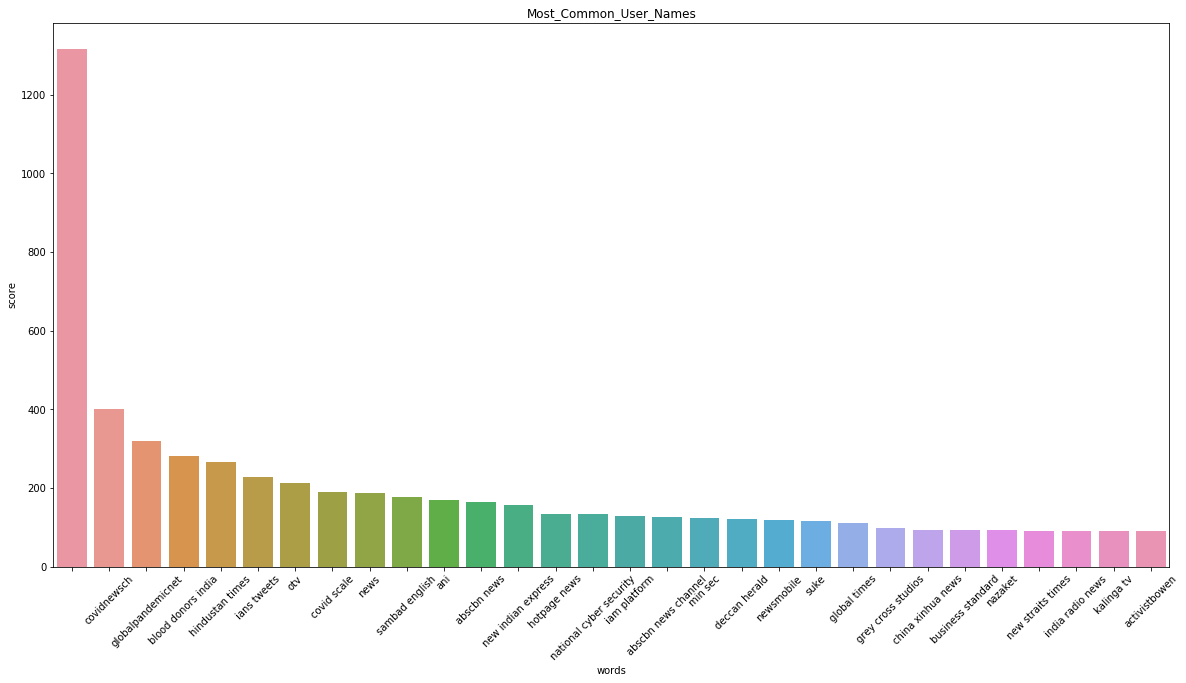

In [104]:
plt.figure(figsize=(20,10))
#by this i can analysis all most common words 
sns.barplot( x = 'words', y = 'score', data=m_c_w_u_result3)
plt.xticks(rotation =45)
plt.title("Most_Common_User_Names")
plt.show()

In [105]:
#pip install wordcloud
from wordcloud import WordCloud

In [106]:
def plot_wordcloud(tokens):
    my_wordcloud = WordCloud().generate(tokens)
    plt.imshow(my_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [107]:
def get_token_name (token_result):
    token_name = ' '.join(token_result)
    return token_name

In [108]:
tokens_list=['clean_source_token_result2',
             'clean_hashtags_token_result2',
             'clean_text_token_result2',
             'clean_user_description_token_result2',
             'clean_user_location_token_result2',
             'clean_user_token_result2']
for token_list in tokens_list:
    
    if token_list == 'clean_user_token_result2':
        clean_user_wordcloud = get_token_name(user_name_tokens_result_2)
    elif token_list == 'clean_user_location_token_result2':
        clean_user_location_wordcloud = get_token_name(user_loaction_tokens_result_2)
    elif token_list == 'clean_user_description_token_result2':
        clean_user_description_wordcloud = get_token_name(user_description_tokens_result_2)
    elif token_list == 'clean_text_token_result2':
        clean_text_wordcloud = get_token_name(text_tokens_result_2)
    elif token_list == 'clean_hashtags_token_result2':
        clean_hashtags_wordcloud = get_token_name(hashtags_tokens_result_2)   
    elif token_list == 'clean_source_token_result2':
        clean_source_wordcloud = get_token_name(source_tokens_result_2)

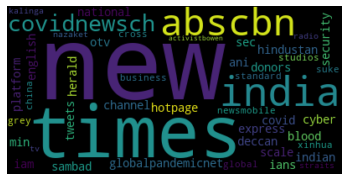

In [109]:
plot_wordcloud(clean_user_wordcloud)

In [110]:
#plot_wordcloud(clean_user_location_wordcloud)

In [111]:
#plot_wordcloud(clean_user_description_wordcloud)

In [112]:
#plot_wordcloud(clean_text_wordcloud)

In [113]:
#plot_wordcloud(clean_hashtags_wordcloud)

In [114]:
#plot_wordcloud(clean_source_wordcloud)